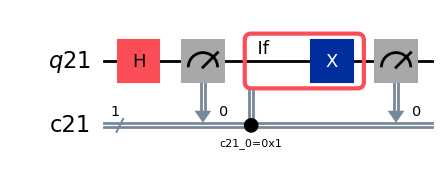

In [ ]:
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)):
    circuit.x(q0)
circuit.measure(q0, c0)
circuit.draw("mpl")
 
# example output counts: {'0': 1024}

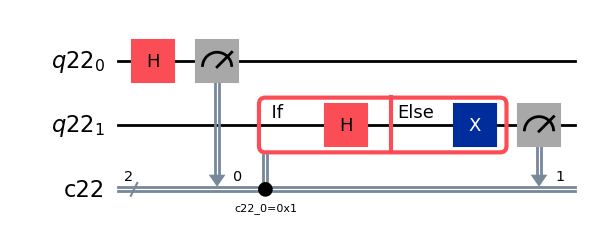

In [ ]:
qubits = QuantumRegister(2)
clbits = ClassicalRegister(2)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1) = qubits
(c0, c1) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.if_test((c0, 1)) as else_:
    circuit.h(q1)
with else_:
    circuit.x(q1)
circuit.measure(q1, c1)
 
circuit.draw("mpl")
 
# example output counts: {'01': 260, '11': 272, '10': 492}

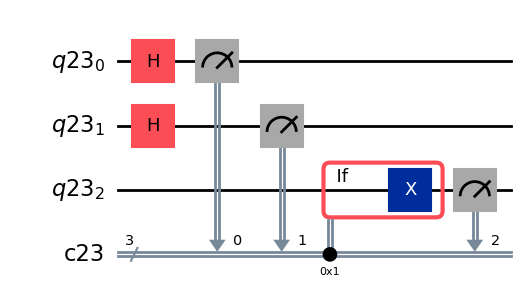

In [ ]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.if_test((clbits, 0b001)):
    circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 
# example output counts: {'101': 269, '011': 260, '000': 252, '010': 243}

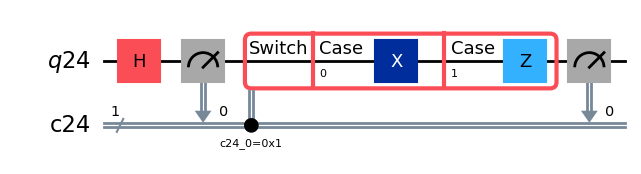

In [ ]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
circuit.h(q0)
circuit.measure(q0, c0)
with circuit.switch(c0) as case:
    with case(0):
        circuit.x(q0)
    with case(1):
        circuit.z(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 
# example output counts: {'1': 1024}

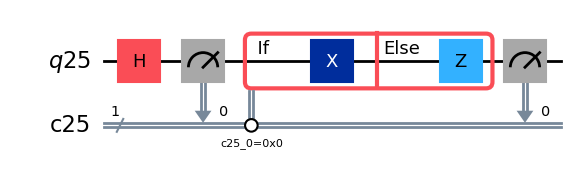

In [ ]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
qc = QuantumCircuit(qubits,clbits)

(q0,) = qubits
(c0,) = clbits
qc.h(q0)
qc.measure(q0, c0)

with qc.if_test((c0, 0)) as else_:
    qc.x(q0)
with else_:
    qc.z(q0)
qc.measure(q0, c0)
 
qc.draw("mpl")

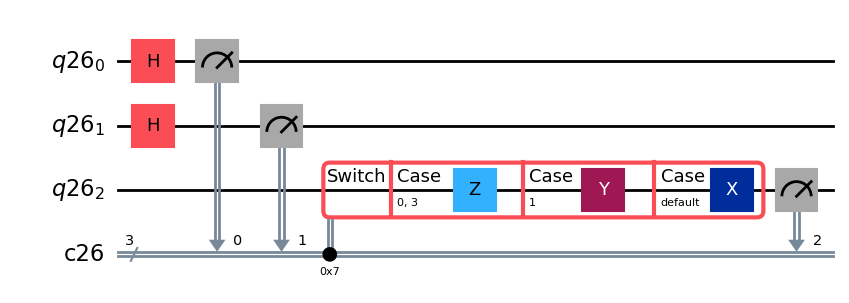

In [ ]:
qubits = QuantumRegister(3)
clbits = ClassicalRegister(3)
circuit = QuantumCircuit(qubits, clbits)
(q0, q1, q2) = qubits
(c0, c1, c2) = clbits
 
circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)
with circuit.switch(clbits) as case:
    with case(0b000, 0b011):
        circuit.z(q2)
    with case(0b001):
        circuit.y(q2)
    with case(case.DEFAULT):
        circuit.x(q2)
circuit.measure(q2, c2)
 
circuit.draw("mpl")
 
# example output counts: {'101': 267, '110': 249, '011': 265, '000': 243}

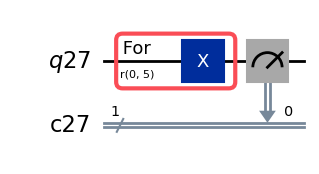

In [ ]:
qubits = QuantumRegister(1)
clbits = ClassicalRegister(1)
circuit = QuantumCircuit(qubits, clbits)
(q0,) = qubits
(c0,) = clbits
 
with circuit.for_loop(range(5)) as _:
    circuit.x(q0)
circuit.measure(q0, c0)
 
circuit.draw("mpl")
 
# example output counts: {'1': 1024}

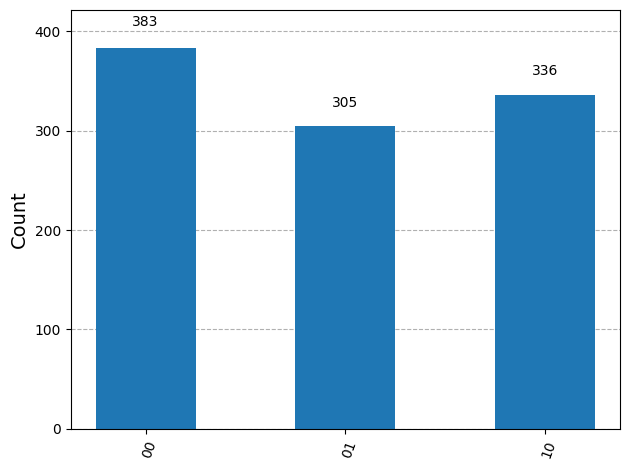

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# build the same dynamic circuit
qubits = QuantumRegister(2, "q")
clbits = ClassicalRegister(2, "c")
circuit = QuantumCircuit(qubits, clbits)

q0, q1 = qubits
c0, c1 = clbits

circuit.h([q0, q1])
circuit.measure(q0, c0)
circuit.measure(q1, c1)

with circuit.while_loop((clbits, 0b11)):
    circuit.h([q0, q1])
    circuit.measure(q0, c0)
    circuit.measure(q1, c1)

# instantiate AerSimulator
simulator = AerSimulator()

# transpile & run locally
transpiled = transpile(circuit, simulator, optimization_level=3)
job = simulator.run(transpiled, shots=1024)
result = job.result()

# histogram of counts
counts = result.get_counts()
plot_histogram(counts)